**Assignment 2- CNN**

Mostafa Zamaniturk

In [26]:
import keras
import tensorflow as tf, keras # Put Keras here to work in Colab
from tensorflow.keras.layers import MaxPooling2D
from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense
from keras import optimizers, regularizers
from keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD, RMSprop
# from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K


In [ ]:
# Create train and test dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


1.a. start with creating a visualization of your input data

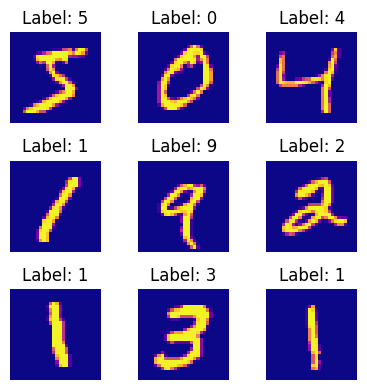

In [ ]:
#1.a. Create the visualization here
# Let's look into the dataset by visualizing some data opints

plt.figure(figsize=(4, 4))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='plasma')   # Show image in grayscale
    plt.title(f"Label: {y_train[i]}")     # Show its corresponding label
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
#preprocessing
# Keras allows us to add the number of channels either to the beggining of shape or the end of it
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [ ]:
# You need to apply some preprocessing on X and y

# normalize inputs from 0-255 to 0-1

# Convert from integers to float32 and normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Encode outputs

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

1.b. Create a CNN model with 4 convolution layers in which two of them have 32 and two of them have 64 filters. The fully connected layer has one hidden layer (512 nodes). Draw the Learning curve. What is your understanding from learning curve? Batch size=128 and epochs=20

In [ ]:
#1.b.
# Create model here

# Create CNN model
model = Sequential()

# 1st Conv Layer: 32 filters
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())

# 2nd Conv Layer: 32 filters
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 3rd Conv Layer: 64 filters
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())

# 4th Conv Layer: 64 filters
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Flatten and Fully Connected Layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(10, activation='softmax'))


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

# Train model
hist = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.8180 - loss: 0.6426 - val_accuracy: 0.9364 - val_loss: 0.1961
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9726 - loss: 0.0894 - val_accuracy: 0.9903 - val_loss: 0.0297
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9828 - loss: 0.0595 - val_accuracy: 0.9916 - val_loss: 0.0260
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9848 - loss: 0.0499 - val_accuracy: 0.9920 - val_loss: 0.0228
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9865 - loss: 0.0422 - val_accuracy: 0.9906 - val_loss: 0.0306
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9874 - loss: 0.0397 - val_accuracy: 0.9918 - val_loss: 0.0261
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9895 - loss: 0.0345 - val_accuracy: 0.9927 - val_loss: 0.0223
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9888 - loss: 0.0343 - val_accuracy: 

In [ ]:
# Measure test accuracy
scores = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9926 - loss: 0.0217
Accuracy: 99.49%


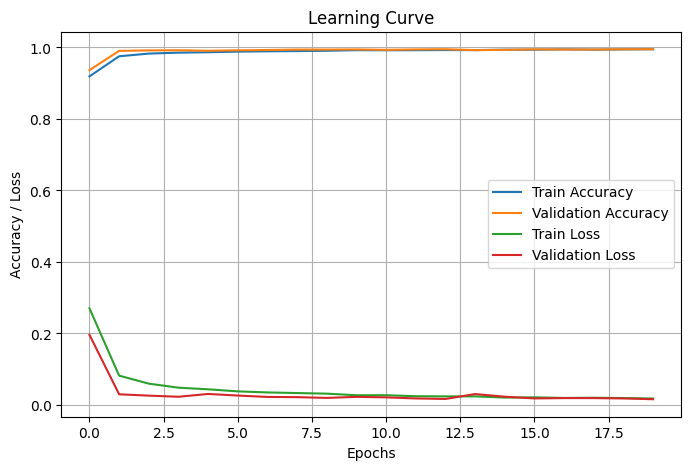

In [ ]:
# Draw Learning curve
def learning_curve(hist):
    plt.figure(figsize=(8,5))
    # Accuracy
    plt.plot(hist.history['accuracy'], label='Train Accuracy')
    plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
    # Loss
    plt.plot(hist.history['loss'], label='Train Loss')
    plt.plot(hist.history['val_loss'], label='Validation Loss')
    plt.title("Learning Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy / Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

learning_curve(hist)

In [ ]:
# Extra Information

from sklearn.metrics import confusion_matrix
import numpy as np

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert one-hot labels back to integers
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

num_classes = 10

TP = np.diag(cm)               # True Positives: diagonal of confusion matrix
FP = cm.sum(axis=0) - TP       # False Positives: column sum minus TP
FN = cm.sum(axis=1) - TP       # False Negatives: row sum minus TP
TN = cm.sum() - (TP + FP + FN) # True Negatives: all others

# Print results per class
for i in range(num_classes):
    print(f"Class {i}: TP={TP[i]}, FP={FP[i]}, TN={TN[i]}, FN={FN[i]}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion Matrix:
 [[ 977    1    0    0    0    0    1    1    0    0]
 [   0 1134    0    0    0    0    1    0    0    0]
 [   1    1 1027    0    0    0    1    2    0    0]
 [   0    1    1 1005    0    2    0    0    1    0]
 [   0    0    0    0  973    0    2    0    0    7]
 [   0    0    0    2    0  887    1    1    0    1]
 [   2    1    0    0    0    1  954    0    0    0]
 [   0    5    1    0    1    0    0 1019    1    1]
 [   1    0    0    0    0    0    0    0  972    1]
 [   0    0    0    0    7    1    0    0    0 1001]]
Class 0: TP=977, FP=4, TN=9016, FN=3
Class 1: TP=1134, FP=9, TN=8856, FN=1
Class 2: TP=1027, FP=2, TN=8966, FN=5
Class 3: TP=1005, FP=2, TN=8988, FN=5
Class 4: TP=973, FP=8, TN=9010, FN=9
Class 5: TP=887, FP=4, TN=9104, FN=5
Class 6: TP=954, FP=6, TN=9036, FN=4
Class 7: TP=1019, FP=4, TN=8968, FN=9
Class 8: TP=972, FP=2, TN=9024, FN=2
Class 9: TP=1001, FP=10, TN=8981, FN=8


In [ ]:
## What is your understanding from the learning curve?
# They look fine. There is a little bit of overfitting but nothing to be worried about

The CNN model trained on the MNIST dataset demonstrates outstanding performance. After 20 epochs, the training accuracy reached 99.56%, and the validation accuracy was 99.49%, indicating excellent generalization. The low training loss (0.0150) and validation loss (0.0159) show that the model effectively learned the key features of handwritten digits. Examining the per-class metrics, we see that most classes have very high true positives (TP) and very low false positives (FP) and false negatives (FN), which confirms that the model is reliably classifying digits across all categories. For example, Class 1 has 1134 TP with only 9 FP and 1 FN, and Class 5 has 887 TP with 4 FP and 5 FN, indicating balanced and accurate predictions across digits.

From the learning curve and confusion matrix, it is clear that the model exhibits minimal overfitting, as validation accuracy closely tracks training accuracy. The high TN values for all classes further indicate that the model rarely misclassifies other digits as the current class. Overall, this combination of learning curve trends and TP/FP/FN analysis confirms that the CNN is robust, generalizes well, and provides highly accurate predictions on the MNIST test set, making it suitable for practical digit recognition tasks.

| Class | TP   | FP | TN   | FN |
| ----- | ---- | -- | ---- | -- |
| 0     | 977  | 4  | 9016 | 3  |
| 1     | 1134 | 9  | 8856 | 1  |
| 2     | 1027 | 2  | 8966 | 5  |
| 3     | 1005 | 2  | 8988 | 5  |
| 4     | 973  | 8  | 9010 | 9  |
| 5     | 887  | 4  | 9104 | 5  |
| 6     | 954  | 6  | 9036 | 4  |
| 7     | 1019 | 4  | 8968 | 9  |
| 8     | 972  | 2  | 9024 | 2  |
| 9     | 1001 | 10 | 8981 | 8  |


**Part 2- CIFAR10**

In [11]:


(X_train, y_train), (X_test, y_test) = cifar10.load_data()  # Load CIFAR 10 data here
labels= ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
print(X_train.shape)
print(X_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


/tmp/ipython-input-3767347187.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(labels[int(y_train[i])])


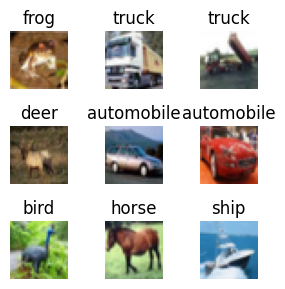

In [12]:
# 2.a. Let's look into the dataset by visualizing some data opints

# Display 9 sample images from the CIFAR-10 dataset
plt.figure(figsize=(3, 3))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i])
    plt.title(labels[int(y_train[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()

2.b. Apply the pre-processing algorithms that we discussed last week. The augmented images are supposed to be seared by 20%, zoomed by 20% and horizontally flipped. Now, design a CNN model with 4 convolution layers in which two of them have 32 and two of them have 64 filters. The fully connected layer has two hidden layers (512 and 256 nodes respectively). Draw the Learning curve. What is your understanding from learning curve?

Based on the learning curve, as the training progresses through the epochs, both the training and validation accuracies increase. However, the training accuracy remains consistently higher than the validation accuracy, and the widening gap between them indicates potential overfitting. After applying dropout, the overfitting issue appears to be mitigated. Nevertheless, the model still requires additional optimization techniques to further improve accuracy and reduce loss.

In [13]:
# 2.b
# Encoding output
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize inputs from 0-255 to 0-1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode outputs
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data augmentation
# create data generator
datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

# prepare iterator
it_train = datagen.flow(X_train, y_train, batch_size=128) # 128 better for faster training on GPUs.

# Create model here
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),


    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),


    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')

])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #Compile model

hist = model.fit(
    it_train,
    epochs=20,

    validation_data=(X_test, y_test),
) # start training

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 84ms/step - accuracy: 0.4040 - loss: 1.7395 - val_accuracy: 0.3509 - val_loss: 1.7806
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.6431 - loss: 1.0079 - val_accuracy: 0.6740 - val_loss: 0.9288
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.7159 - loss: 0.8070 - val_accuracy: 0.7249 - val_loss: 0.7941
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.7515 - loss: 0.7009 - val_accuracy: 0.7278 - val_loss: 0.7875
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.7837 - loss: 0.6265 - val_accuracy: 0.7421 - val_loss: 0.7685
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.7993 - loss: 0.5769 - val_accuracy: 0.7580 - val_loss: 0.7488
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.8132 - loss: 0.5284 - val_accuracy: 0.7674 - val_loss: 0.7091
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 74ms/step - accuracy: 0.8293 - loss: 0.4850 - val_accurac

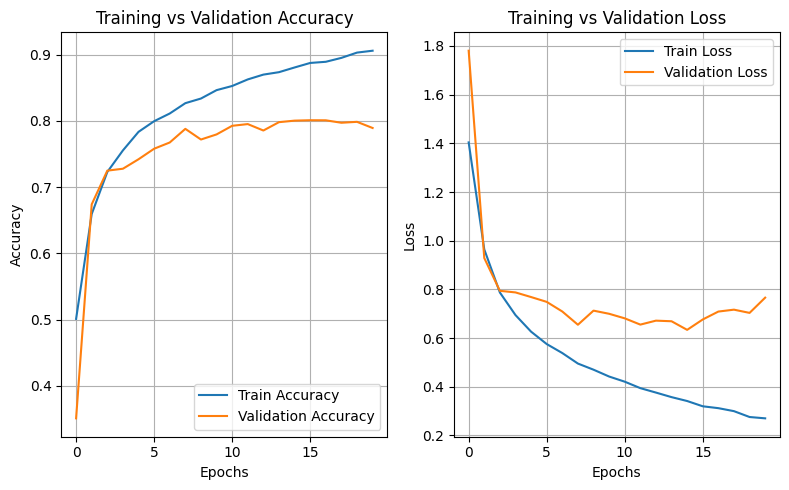

In [14]:
# Draw learning curve here
def learning_curve(hist):

    plt.figure(figsize=(8,5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'], label='Train Accuracy')
    plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'], label='Train Loss')
    plt.plot(hist.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


learning_curve(hist)


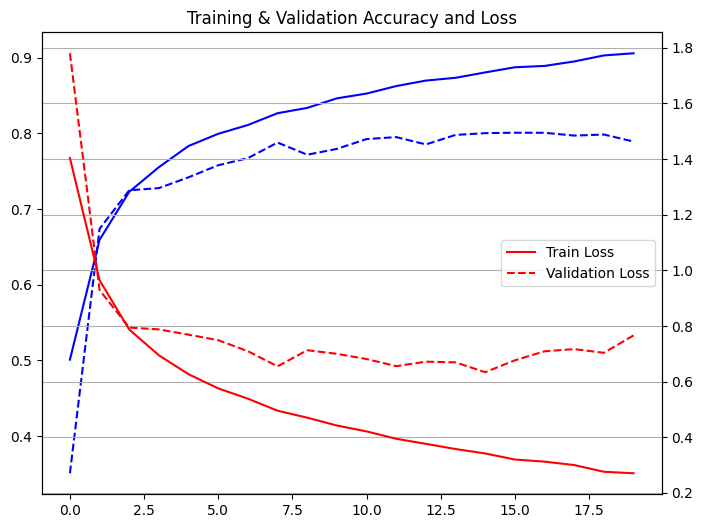

In [15]:
def learning_curve_combined(hist):
    plt.figure(figsize=(8,6))

    # Plot accuracy
    plt.plot(hist.history['accuracy'], 'b-', label='Train Accuracy')
    plt.plot(hist.history['val_accuracy'], 'b--', label='Validation Accuracy')

    # Create a second y-axis for loss
    plt.twinx()
    plt.plot(hist.history['loss'], 'r-', label='Train Loss')
    plt.plot(hist.history['val_loss'], 'r--', label='Validation Loss')

    # Labels and title
    plt.title('Training & Validation Accuracy and Loss')
    plt.xlabel('Epochs')
    plt.grid(True)

    # Legends
    lines, labels = plt.gca().get_legend_handles_labels()
    plt.legend(lines, labels, loc='center right')

    plt.show()

# Call it
learning_curve_combined(hist)

In [16]:
# Display training and validation accuracy and loss
def show_model_metrics(hist):
    # Final accuracy
    final_train_acc = hist.history['accuracy'][-1]
    final_val_acc = hist.history['val_accuracy'][-1]

    # Final loss
    final_train_loss = hist.history['loss'][-1]
    final_val_loss = hist.history['val_loss'][-1]

    print(f"Final Training Accuracy: {final_train_acc*100:.2f}%")
    print(f"Final Validation Accuracy: {final_val_acc*100:.2f}%")
    print(f"Final Training Loss: {final_train_loss:.4f}")
    print(f"Final Validation Loss: {final_val_loss:.4f}")

show_model_metrics(hist)


Final Training Accuracy: 90.60%
Final Validation Accuracy: 78.93%
Final Training Loss: 0.2702
Final Validation Loss: 0.7661


In [17]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Predict classes for test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)

# Calculate TP, TN, FP, FN for each class
num_classes = cm.shape[0]

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    print(f"Class {i}: TP={TP}, FP={FP}, TN={TN}, FN={FN}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Confusion Matrix:
 [[828  19  36  12   8   1  16   2  30  48]
 [  2 928   2   1   0   0   8   1   6  52]
 [ 48   4 743  29  39  29  78   9   8  13]
 [ 24  11  95 554  48  63 151  22  12  20]
 [ 17   3  68  24 763   9  92  18   4   2]
 [ 14   6  89 119  52 608  73  22   2  15]
 [  3   2  35  18   5   3 929   1   2   2]
 [ 13   8  41  25  68  21  21 787   0  16]
 [ 49  29  17   7   3   0  13   1 846  35]
 [ 12  57   3   1   0   0  10   2   8 907]]
Class 0: TP=828, FP=182, TN=8818, FN=172
Class 1: TP=928, FP=139, TN=8861, FN=72
Class 2: TP=743, FP=386, TN=8614, FN=257
Class 3: TP=554, FP=236, TN=8764, FN=446
Class 4: TP=763, FP=223, TN=8777, FN=237
Class 5: TP=608, FP=126, TN=8874, FN=392
Class 6: TP=929, FP=462, TN=8538, FN=71
Class 7: TP=787, FP=78, TN=8922, FN=213
Class 8: TP=846, FP=72, TN=8928, FN=154
Class 9: TP=907, FP=203, TN=8797, FN=93


In [ ]:
# What is the issue and possible solution for this learning curve?

The primary issue observed in the model is overfitting. From the training and validation performance graphs, a significant gap between the two curves indicates that the model generalizes poorly to unseen data. However, it is important to note that additional epochs may be required to confirm that overfitting has fully occurred and to observe whether the validation loss continues to diverge.

Furthermore, analysis of the confusion matrix reveals that the CIFAR-10 dataset is somewhat imbalanced, which can contribute to biased or skewed predictions toward majority classes. The imbalance is evident in the uneven distribution of true positives (TP) and false negatives (FN) across classes, suggesting that certain categories are underrepresented or more difficult for the model to classify accurately.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 48s 98ms/step - accuracy: 0.2151 - loss: 2.2894 - val_accuracy: 0.2862 - val_loss: 1.8719
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.3953 - loss: 1.6231 - val_accuracy: 0.5274 - val_loss: 1.3800
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.4893 - loss: 1.4025 - val_accuracy: 0.5489 - val_loss: 1.2405
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 73ms/step - accuracy: 0.5493 - loss: 1.2536 - val_accuracy: 0.5829 - val_loss: 1.2057
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - accuracy: 0.5890 - loss: 1.1659 - val_accuracy: 0.6453 - val_loss: 1.0648
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.6270 - loss: 1.0786 - val_accuracy: 0.6922 - val_loss: 0.9197
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - accuracy: 0.6507 - loss: 1.0202 - val_accuracy: 0.5995 - val_loss: 1.2402
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.6638 - loss: 0.9836 - val_accurac

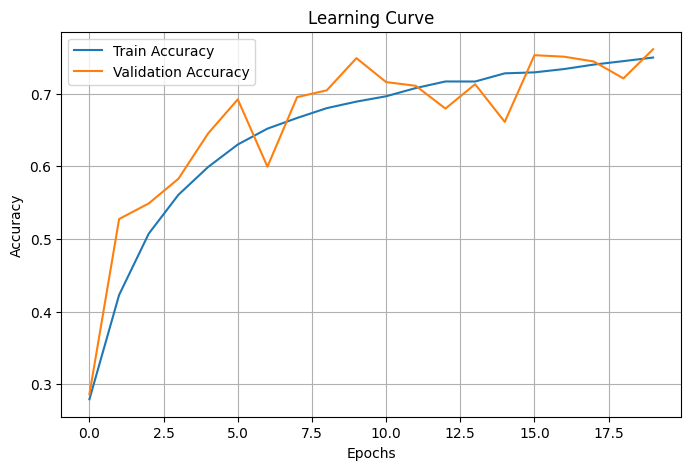

In [4]:
#2.c. Solution to resolve overfitting
# One solution is adding drop out
# Implement your solution here and train model

# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize inputs from 0-255 to 0-1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# On-hot encoder outputs
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create data generator (augmentation)
datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# prepare iterator
it_train = datagen.flow(X_train, y_train, batch_size=128)

# Define CNN model - Implementing Drop-out method
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model using the iterator
hist = model.fit(
    it_train,
    epochs=20,
    validation_data=(X_test, y_test)
)


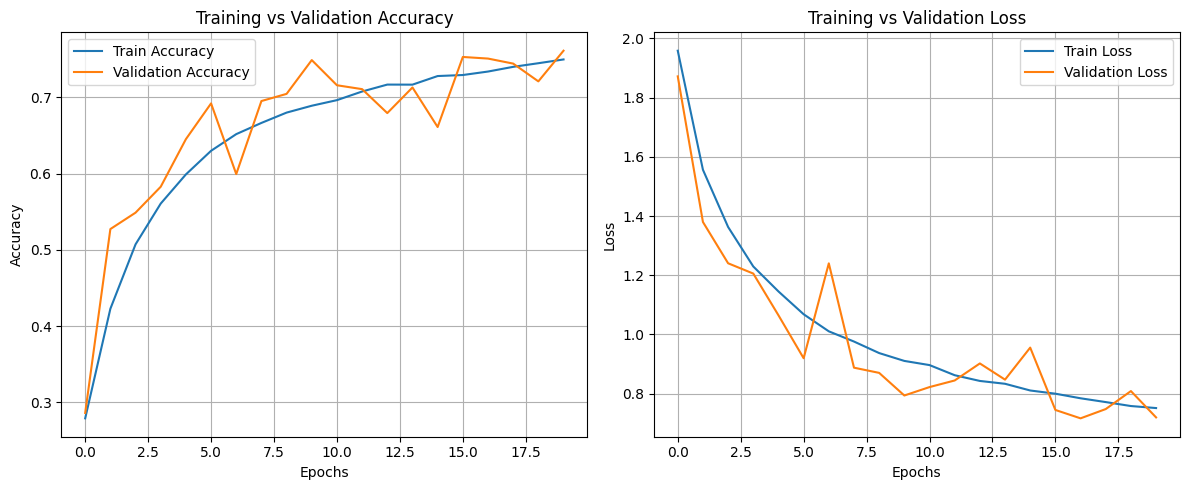

In [9]:
# Draw learning curve

# Draw learning curve here
def learning_curve(hist):
    plt.figure(figsize=(12, 5))

    # --- Accuracy plot ---
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'], label='Train Accuracy')
    plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # --- Loss plot ---
    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'], label='Train Loss')
    plt.plot(hist.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call it after training
learning_curve(hist)


In [8]:
def learning_curve(hist):
    # Create a figure for accuracy
    plt.figure(figsize=(12, 5))

    # --- Accuracy plot ---
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'], label='Training Accuracy')
    plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # --- Loss plot ---
    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'], label='Training Loss')
    plt.plot(hist.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

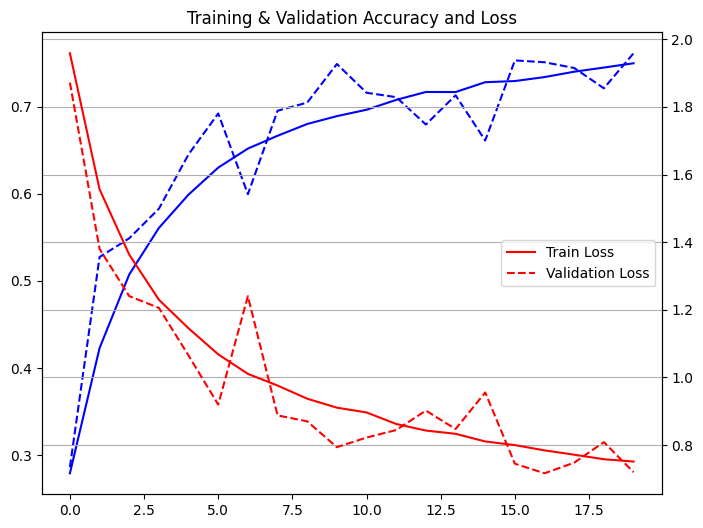

In [10]:
def learning_curve_combined(hist):
    plt.figure(figsize=(8,6))

    # Plot accuracy
    plt.plot(hist.history['accuracy'], 'b-', label='Train Accuracy')
    plt.plot(hist.history['val_accuracy'], 'b--', label='Validation Accuracy')

    # Create a second y-axis for loss
    plt.twinx()
    plt.plot(hist.history['loss'], 'r-', label='Train Loss')
    plt.plot(hist.history['val_loss'], 'r--', label='Validation Loss')

    # Labels and title
    plt.title('Training & Validation Accuracy and Loss')
    plt.xlabel('Epochs')
    plt.grid(True)

    # Legends
    lines, labels = plt.gca().get_legend_handles_labels()
    plt.legend(lines, labels, loc='center right')

    plt.show()

# Call it
learning_curve_combined(hist)


In [13]:
# Display training and validation accuracy and loss
def show_model_metrics(hist):
    # Final accuracy
    final_train_acc = hist.history['accuracy'][-1]
    final_val_acc = hist.history['val_accuracy'][-1]

    # Final loss
    final_train_loss = hist.history['loss'][-1]
    final_val_loss = hist.history['val_loss'][-1]

    print(f"Final Training Accuracy: {final_train_acc*100:.2f}%")
    print(f"Final Validation Accuracy: {final_val_acc*100:.2f}%")
    print(f"Final Training Loss: {final_train_loss:.4f}")
    print(f"Final Validation Loss: {final_val_loss:.4f}")

# Call the function
show_model_metrics(hist)

Final Training Accuracy: 74.98%
Final Validation Accuracy: 76.13%
Final Training Loss: 0.7514
Final Validation Loss: 0.7198


In [14]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Predict classes for test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)

# Calculate TP, TN, FP, FN for each class
num_classes = cm.shape[0]

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    print(f"Class {i}: TP={TP}, FP={FP}, TN={TN}, FN={FN}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Confusion Matrix:
 [[769  18  18   8  24   0  13   4  56  90]
 [  3 862   0   0   2   0   2   0  10 121]
 [ 78   6 531  30 113  31 158  17  13  23]
 [ 17   4  27 511  99 102 147  30  19  44]
 [ 11   1  24  16 828   2  90  16   6   6]
 [ 11   5  37 156  78 566  65  49  18  15]
 [  5   1   8  23  14   3 935   3   4   4]
 [ 15   4  16  25  94  17  28 775   4  22]
 [ 31  18   1   0   5   0   7   1 889  48]
 [  2  24   1   7   2   1   4   0  12 947]]
Class 0: TP=769, FP=173, TN=8827, FN=231
Class 1: TP=862, FP=81, TN=8919, FN=138
Class 2: TP=531, FP=132, TN=8868, FN=469
Class 3: TP=511, FP=265, TN=8735, FN=489
Class 4: TP=828, FP=431, TN=8569, FN=172
Class 5: TP=566, FP=156, TN=8844, FN=434
Class 6: TP=935, FP=514, TN=8486, FN=65
Class 7: TP=775, FP=120, TN=8880, FN=225
Class 8: TP=889, FP=142, TN=8858, FN=111
Class 9: TP=947, FP=373, TN=8627, FN=53


In [ ]:
# 2.d- This part is up to you to choose proper pre-trained model
# I chose VGG16 and RESNet50
# Implementing VGG16
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np

# Load cifar-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data Augmentation
datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)
it_train = datagen.flow(X_train, y_train, batch_size=128)

# Load pre-trained VGG16
# include_top=False removes the fully connected layers at the top
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

# Freeze convolutional base
for layer in base_model.layers:
    layer.trainable = False

# Add custom classifier on top
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # optional, helps prevent overfitting
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

vgg_model = Model(inputs=base_model.input, outputs=predictions)

vgg_model.compile(optimizer=Adam(learning_rate=1e-4),   #Compile VGG16 model
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
hist = vgg_model.fit(
    it_train,
    epochs=20,
    validation_data=(X_test, y_test)
)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 95ms/step - accuracy: 0.1745 - loss: 2.2622 - val_accuracy: 0.4254 - val_loss: 1.6922
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.3611 - loss: 1.7932 - val_accuracy: 0.4824 - val_loss: 1.5040
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - accuracy: 0.4177 - loss: 1.6456 - val_accuracy: 0.5075 - val_loss: 1.4145
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - accuracy: 0.4515 - loss: 1.5665 - val_accuracy: 0.5291 - val_loss: 1.3630
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - accuracy: 0.4706 - loss: 1.5163 - val_accuracy: 0.5354 - val_loss: 1.3292
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - accuracy: 0.4862 - loss: 1.4737 - val_accuracy: 0.5490 - val_loss: 1.2981
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.4996 - loss: 1.4398 - val_accuracy: 0.5525 - val_loss: 1.2794
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 75ms/step - accuracy: 0.5053 - loss: 1.4169 - val_accurac

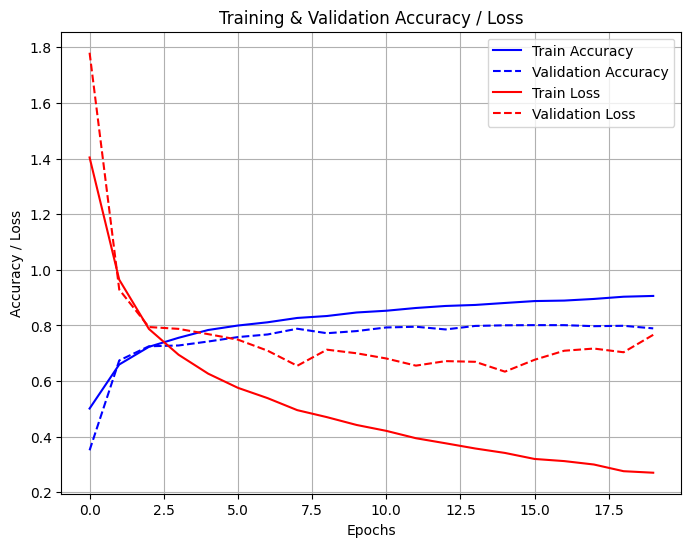

40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.5865 - loss: 1.1706
Test Accuracy: 58.85%
Test Loss: 1.1706


In [22]:
# Function to draw learning curves
def learning_curve(hist):
    plt.figure(figsize=(8,6))

    # Accuracy
    plt.plot(hist.history['accuracy'], 'b-', label='Train Accuracy')
    plt.plot(hist.history['val_accuracy'], 'b--', label='Validation Accuracy')

    # Loss
    plt.plot(hist.history['loss'], 'r-', label='Train Loss')
    plt.plot(hist.history['val_loss'], 'r--', label='Validation Loss')

    plt.title('Training & Validation Accuracy / Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy / Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# --- Draw learning curve ---
learning_curve(hist)

# --- Evaluate model on test set ---
test_loss, test_accuracy = vgg_model.evaluate(X_test, y_test, batch_size=256, verbose=1)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

In [23]:
from sklearn.metrics import confusion_matrix
import numpy as np

# --- Predict classes for test data ---
y_pred = vgg_model.predict(X_test, batch_size=256)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# --- Compute confusion matrix ---
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)

# --- Calculate TP, TN, FP, FN for each class ---
num_classes = cm.shape[0]

print("\nClass-wise TP, FP, TN, FN:")
for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    print(f"Class {i}: TP={TP}, FP={FP}, TN={TN}, FN={FN}")


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step
Confusion Matrix:
 [[690  26  44  13   4  10  17  26 111  59]
 [ 33 644   7  40   3  15  31  21  46 160]
 [ 95  27 384  70 101  82 145  61  16  19]
 [ 27  40  39 422  38 132 164  38  28  72]
 [ 29  17  57  64 458  23 169 113  41  29]
 [ 11  27  41 195  47 492  73  64   9  41]
 [ 11  29  25  57  43  34 761   8  13  19]
 [ 32  19  32  50  49  67  25 654  12  60]
 [ 89  66   9  22   6   1   8   6 718  75]
 [ 43 134   5  32   9  10  22  37  46 662]]

Class-wise TP, FP, TN, FN:
Class 0: TP=690, FP=370, TN=8630, FN=310
Class 1: TP=644, FP=385, TN=8615, FN=356
Class 2: TP=384, FP=259, TN=8741, FN=616
Class 3: TP=422, FP=543, TN=8457, FN=578
Class 4: TP=458, FP=300, TN=8700, FN=542
Class 5: TP=492, FP=374, TN=8626, FN=508
Class 6: TP=761, FP=654, TN=8346, FN=239
Class 7: TP=654, FP=374, TN=8626, FN=346
Class 8: TP=718, FP=322, TN=8678, FN=282
Class 9: TP=662, FP=534, TN=8466, FN=338


In [24]:
vgg_model.evaluate(X_test, y_test, batch_size=256, verbose=1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5865 - loss: 1.1706


[1.1705739498138428, 0.5885000228881836]

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 57s 106ms/step - accuracy: 0.1174 - loss: 2.6490 - val_accuracy: 0.2400 - val_loss: 2.1643
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.1889 - loss: 2.1788 - val_accuracy: 0.2976 - val_loss: 2.0155
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 73ms/step - accuracy: 0.2293 - loss: 2.0916 - val_accuracy: 0.2971 - val_loss: 1.9603
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 74ms/step - accuracy: 0.2494 - loss: 2.0460 - val_accuracy: 0.3095 - val_loss: 1.9429
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.2579 - loss: 2.0186 - val_accuracy: 0.3235 - val_loss: 1.8959
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 73ms/step - accuracy: 0.2720 - loss: 1.9911 - val_accuracy: 0.3287 - val_loss: 1.8787
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 74ms/step - accuracy: 0.2814 - loss: 1.9689 - val_accuracy: 0.3295 - val_loss: 1.8651
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 74ms/step - accuracy: 0.2861 - loss: 1.9531 -

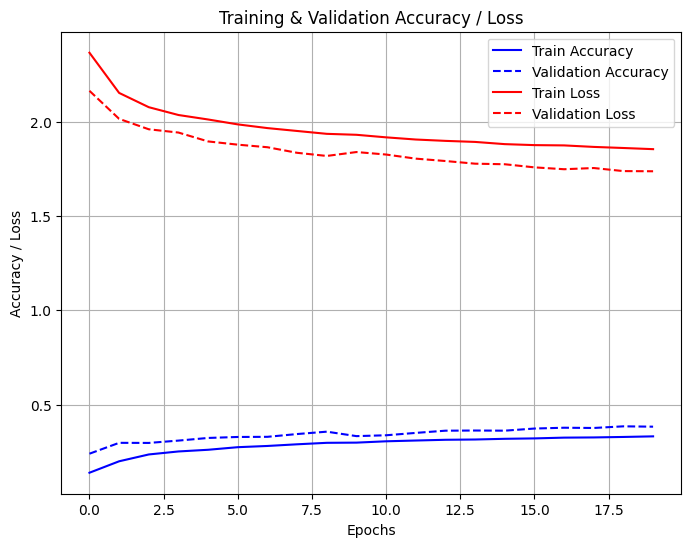

40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.3882 - loss: 1.7350
ResNet50 Test Accuracy: 38.33%
ResNet50 Test Loss: 1.7376


In [27]:
# This ios my second pre-trained model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import GlobalAveragePooling2D

# Load cifar-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data augmentation
datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)
it_train = datagen.flow(X_train, y_train, batch_size=128)

# Load pre-trained ResNet50
# include_top=False removes fully connected layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32,32,3))

# Freeze convolutional base
for layer in base_model.layers:
    layer.trainable = False

# Add custom classifier on top
x = base_model.output
x = GlobalAveragePooling2D()(x)  # flatten feature maps
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

resnet_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
resnet_model.compile(
    optimizer=RMSprop(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
hist = resnet_model.fit(
    it_train,
    epochs=20,
    validation_data=(X_test, y_test)
)

learning_curve(hist)

# Evaluate on the test set
test_loss, test_accuracy = resnet_model.evaluate(X_test, y_test, batch_size=256, verbose=1)
print(f"ResNet50 Test Accuracy: {test_accuracy*100:.2f}%")
print(f"ResNet50 Test Loss: {test_loss:.4f}")

# Let's train the model using RMSprop
# model.compile
# hist=

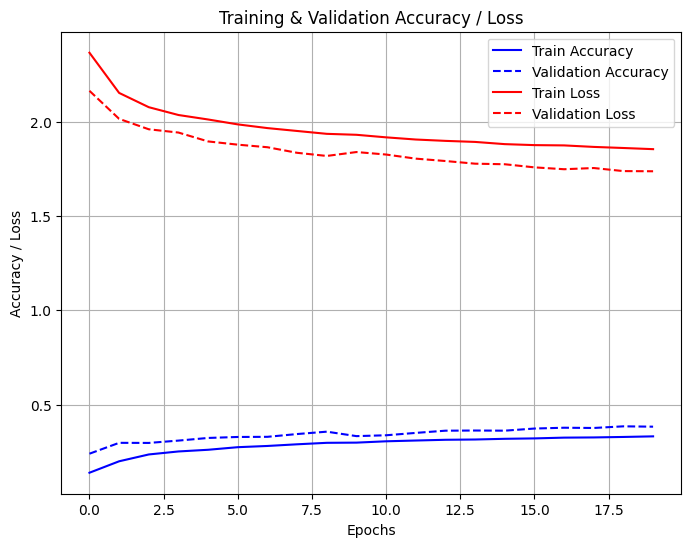

In [29]:
learning_curve(hist)

In [28]:
from sklearn.metrics import confusion_matrix
import numpy as np

# --- Predict classes for test data ---
y_pred = resnet_model.predict(X_test, batch_size=256)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# --- Compute confusion matrix ---
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)

# --- Calculate TP, TN, FP, FN for each class ---
num_classes = cm.shape[0]

print("\nClass-wise TP, FP, TN, FN:")
labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    print(f"{labels[i]}: TP={TP}, FP={FP}, TN={TN}, FN={FN}")


40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step
Confusion Matrix:
 [[341  85 129  11  36  17  51  62 233  35]
 [ 38 452   6  22  10  26  62  81  90 213]
 [ 87  38 266  37 162 139  93 125  26  27]
 [ 26  64  87 117 113 225  90 191  23  64]
 [ 31  32 114  63 361  67 128 147  32  25]
 [ 16  42  82  81  77 388  45 217  15  37]
 [ 32 100 103  62 151  65 338  93  20  36]
 [ 14  49  52  30  60 124  22 554  13  82]
 [ 97 119  32  13  25  45  29  44 503  93]
 [ 15 160  11  23  18  30  27 107  96 513]]

Class-wise TP, FP, TN, FN:
airplane: TP=341, FP=356, TN=8644, FN=659
automobile: TP=452, FP=689, TN=8311, FN=548
bird: TP=266, FP=616, TN=8384, FN=734
cat: TP=117, FP=342, TN=8658, FN=883
deer: TP=361, FP=652, TN=8348, FN=639
dog: TP=388, FP=738, TN=8262, FN=612
frog: TP=338, FP=547, TN=8453, FN=662
horse: TP=554, FP=1067, TN=7933, FN=446
ship: TP=503, FP=548, TN=8452, FN=497
truck: TP=513, FP=612, TN=8388, FN=487


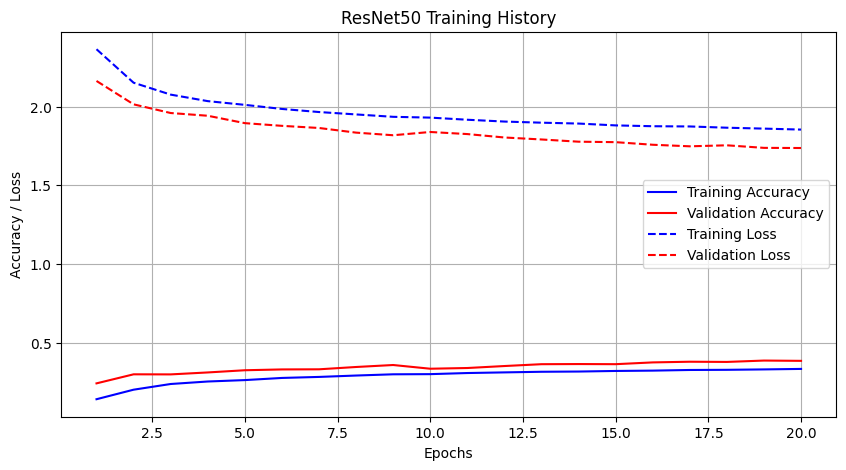

In [30]:
import matplotlib.pyplot as plt

def plot_resnet_history(hist):
    """
    Plots training and validation accuracy and loss for ResNet50 model.

    Args:
        hist: History object returned by resnet_model.fit()
    """
    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    epochs = range(1, len(acc)+1)

    plt.figure(figsize=(10,5))

    # Plot training & validation accuracy
    plt.plot(epochs, acc, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')

    # Plot training & validation loss
    plt.plot(epochs, loss, 'b--', label='Training Loss')
    plt.plot(epochs, val_loss, 'r--', label='Validation Loss')

    plt.title("ResNet50 Training History")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy / Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

# Use the function
plot_resnet_history(hist)
